<a href="https://colab.research.google.com/github/anjujayapal/EV-vehicle-market-analysis/blob/main/EV%20vehicle%20market%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING

In [4]:
import pandas as pd

ev_data = pd.read_csv('/content/drive/MyDrive/Projects/EV vehicle market analysis/EV-data/Electric_Vehicle_Population_Data.csv')

print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

DATASET CLEANING

In [6]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [7]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
ev_data = ev_data.dropna()

1. EV Adoption Over Time: Analyze the growth of the EV population by model year.

<ipython-input-21-bffec0cbf444>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")


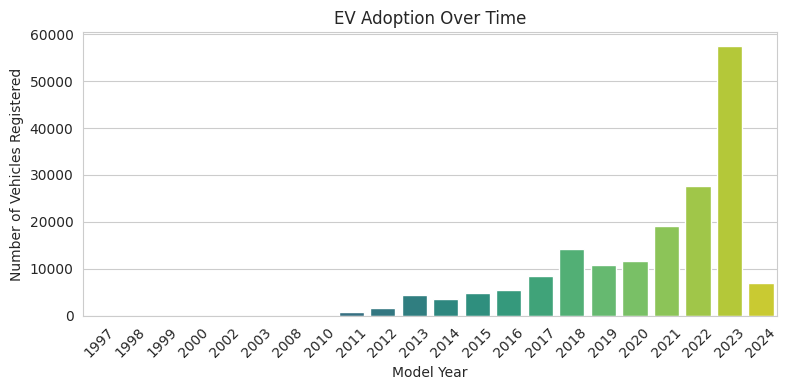

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# EV Adoption Over Time
plt.figure(figsize=(8, 4))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.*

2. Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).

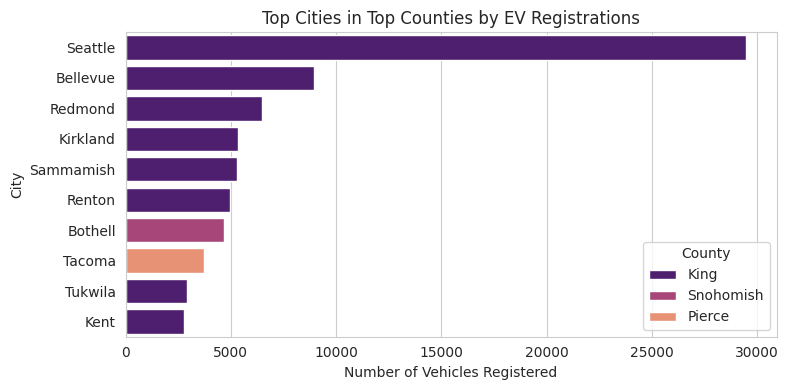

In [22]:
# Top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties

# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

The key findings from the above graph:


*   Seattle, which is in King County, has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.
*   Bellevue and Redmond, also in King County, follow Seattle with the next highest registrations, though these are considerably less than Seattle’s.
*  Cities in Snohomish County, such as Kirkland and Sammamish, show moderate EV registrations.
*   Tacoma and Tukwila, representing Pierce County, have the fewest EV registrations among the cities listed, with Tacoma slightly ahead of Tukwila.
*   The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.
*   Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.







**3. EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).**

<ipython-input-23-e3e00feaca41>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")


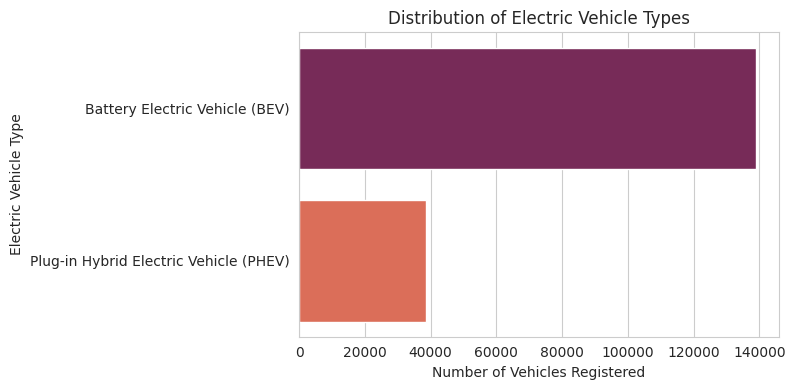

In [23]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.

4. Make and Model Popularity: Identify the most popular makes and models among the registered EVs.

<ipython-input-24-df050ab9e08f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


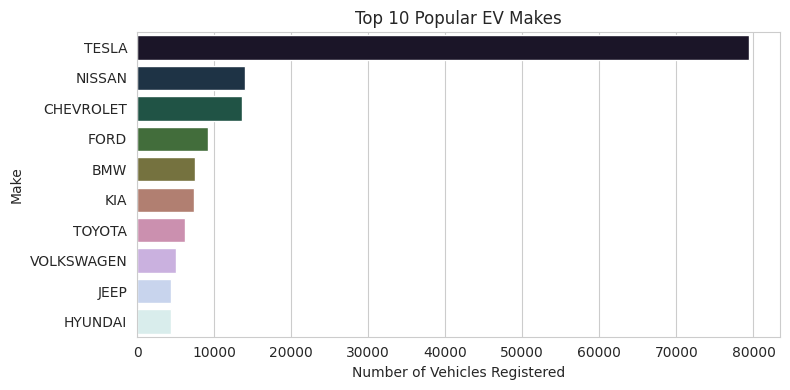

In [24]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(8,4))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()



*   TESLA leads by a substantial margin with the highest number of vehicles registered.
*   NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.

*   FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in decreasing order of the number of registered vehicles.






5. Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.

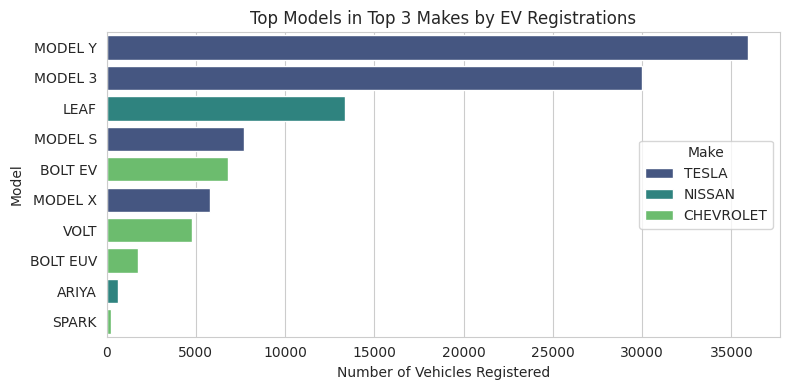

In [25]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

6. Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.

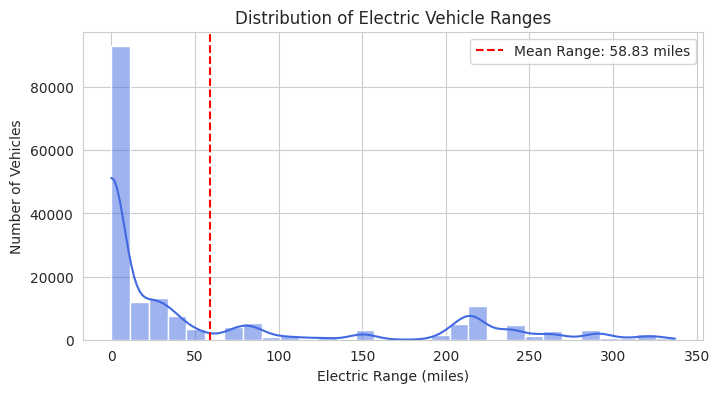

In [26]:
# analyzing the distribution of electric range
plt.figure(figsize=(8,4))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()



*   There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.
*   The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.
*   The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.
*   Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.





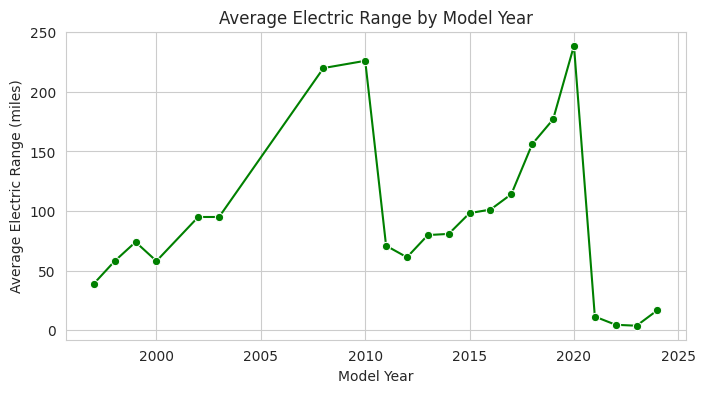

In [27]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()



*   There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
*   There is a noticeable peak around the year 2020 when the average range reaches its highest point.
*   Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
*   After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.





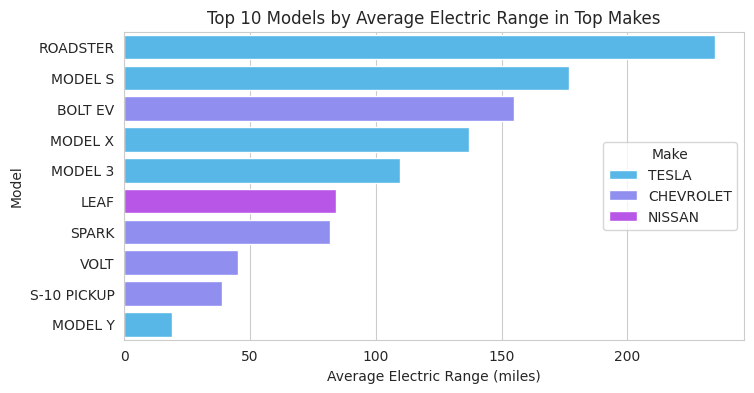

In [28]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(8,4))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

Estimated Market Size Analysis of Electric Vehicles in the United States

In [17]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

The Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations:

In [18]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.2066611501, 2025: 119653.95934090775, 2026: 181047.21317328632, 2027: 273940.7335817853, 2028: 414496.9933533305, 2029: 627171.2689549965}


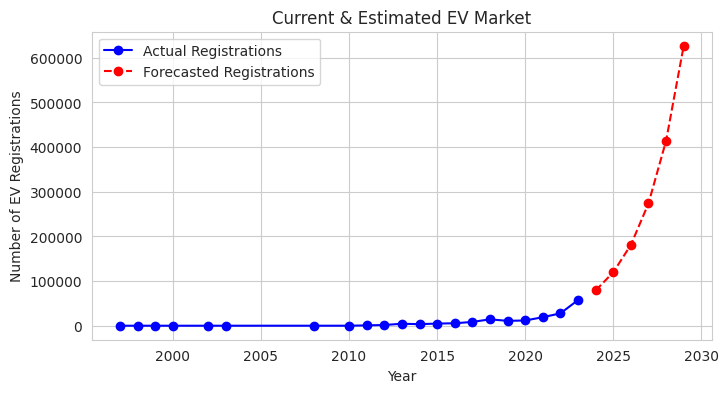

In [29]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(8,4))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

Given the growing trend in actual EV registrations and the projected acceleration as per the forecast data, we can conclude that the EV market size is expected to expand considerably. The steep increase in forecasted registrations suggests that consumer adoption of EVs is on the rise, and this trend is likely to continue. Overall, the data point towards a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.




